In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
import pandas as pd
import numpy as np
import sklearn
from sklearn import linear_model
from sklearn.utils import shuffle
import matplotlib.pyplot as plt
%matplotlib inline
import pickle
from matplotlib import style
import seaborn as sns
plt.style.use("ggplot")

In [3]:
data = pd.read_csv("student_mat.csv", sep=";")

In [4]:
data

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2,2,services,services,...,5,5,4,4,5,4,11,9,9,9
391,MS,M,17,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,3,14,16,16
392,MS,M,21,R,GT3,T,1,1,other,other,...,5,5,3,3,3,3,3,10,8,7
393,MS,M,18,R,LE3,T,3,2,services,other,...,4,4,1,3,4,5,0,11,12,10


## Data analysis

In [5]:
df_analysis = data[["sex", "age", "traveltime","absences","freetime","studytime", "schoolsup", "health","failures","activities", "internet", "paid", "Fjob", "Mjob", "G1", "G2", "G3"]]

df_analysis.head()


,sex,age,traveltime,absences,freetime,studytime,schoolsup,health,failures,activities,internet,paid,Fjob,Mjob,G1,G2,G3
0,F,18,2,6,3,2,yes,3,0,no,no,no,teacher,at_home,5,6,6
1,F,17,1,4,3,2,no,3,0,no,yes,no,other,at_home,5,5,6
2,F,15,1,10,3,2,yes,3,3,no,yes,yes,other,at_home,7,8,10
3,F,15,1,2,2,3,no,5,0,yes,yes,yes,services,health,15,14,15
4,F,16,1,4,3,2,no,5,0,no,no,yes,other,other,6,10,10


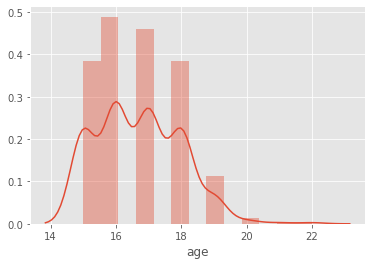

In [6]:
sns.distplot(df_analysis["age"], kde=True)

#### Maximum age students in the class is between 15 to 16

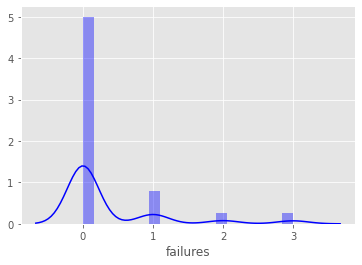

In [7]:
sns.distplot(df_analysis["failures"], kde=True, color="b")

#### Number of failures in the class is less 

## Graph showing absences related to age

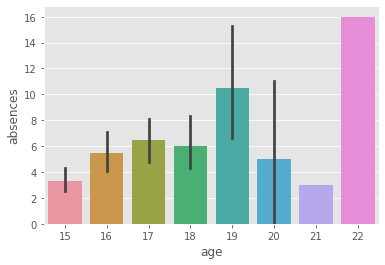

In [8]:
# health - current health status (numeric: from 1 - very bad to 5 - very good)
sns.barplot(x="age", y="absences", data=df_analysis)

#### The above graph shows that absences is maximum in the age 22 

##  Graphs showing absences affecting marks 

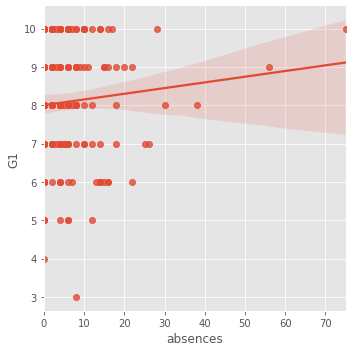

In [9]:
# remove outliers
df_analysis = df_analysis.loc[df_analysis['G1']< df_analysis['G1'].quantile(0.5)]
# plotting grpah
graph = sns.lmplot(x="absences", y="G1", data=df_analysis)

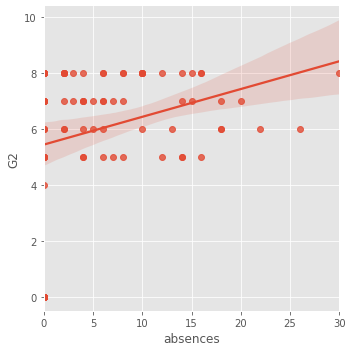

In [10]:
# remove outliers
df_analysis = df_analysis.loc[df_analysis['G2']< df_analysis['G2'].quantile(0.5)]
# ploting graph
graph = sns.lmplot(x="absences", y="G2", data=df_analysis)

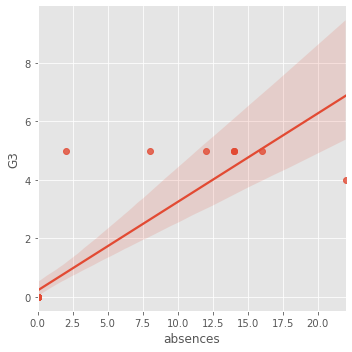

In [11]:

# remove outliers
df_analysis = df_analysis.loc[df_analysis['G3']< df_analysis['G3'].quantile(0.5)]
# plotting graph
graph = sns.lmplot(x="absences", y="G3", data=df_analysis)

#### We can clearly say that absence in class is somewhat related to lower marks obtained by students

## Final Marks prediction

In [12]:
df = data[["G1", "G2", "G3", "absences","studytime", "freetime", "health"]]

In [13]:
df.head()

,G1,G2,G3,absences,studytime,freetime,health
0,5,6,6,6,2,3,3
1,5,5,6,4,2,3,3
2,7,8,10,10,2,3,3
3,15,14,15,2,3,2,5
4,6,10,10,4,2,3,5


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   G1         395 non-null    int64
 1   G2         395 non-null    int64
 2   G3         395 non-null    int64
 3   absences   395 non-null    int64
 4   studytime  395 non-null    int64
 5   freetime   395 non-null    int64
 6   health     395 non-null    int64
dtypes: int64(7)
memory usage: 21.7 KB


### predict G3 marks 

In [15]:
predict = "G3"

In [16]:
# y = mx + c

# x will have g1 and g2 value only 
X = np.array(df.drop([predict], 1)) 
print(X)

[[ 5  6  6  2  3  3]
 [ 5  5  4  2  3  3]
 [ 7  8 10  2  3  3]
 ...
 [10  8  3  1  5  3]
 [11 12  0  1  4  5]
 [ 8  9  5  1  2  5]]


In [17]:
# y will have g3 value which we will predict
y = np.array(df[[predict]])
print(y)

[[ 6]
 [ 6]
 [10]
 [15]
 [10]
 [15]
 [11]
 [ 6]
 [19]
 [15]
 [ 9]
 [12]
 [14]
 [11]
 [16]
 [14]
 [14]
 [10]
 [ 5]
 [10]
 [15]
 [15]
 [16]
 [12]
 [ 8]
 [ 8]
 [11]
 [15]
 [11]
 [11]
 [12]
 [17]
 [16]
 [12]
 [15]
 [ 6]
 [18]
 [15]
 [11]
 [13]
 [11]
 [12]
 [18]
 [11]
 [ 9]
 [ 6]
 [11]
 [20]
 [14]
 [ 7]
 [13]
 [13]
 [10]
 [11]
 [13]
 [10]
 [15]
 [15]
 [ 9]
 [16]
 [11]
 [11]
 [ 9]
 [ 9]
 [10]
 [15]
 [12]
 [ 6]
 [ 8]
 [16]
 [15]
 [10]
 [ 5]
 [14]
 [11]
 [10]
 [10]
 [11]
 [10]
 [ 5]
 [12]
 [11]
 [ 6]
 [15]
 [10]
 [ 8]
 [ 6]
 [14]
 [10]
 [ 7]
 [ 8]
 [18]
 [ 6]
 [10]
 [14]
 [10]
 [15]
 [10]
 [14]
 [ 8]
 [ 5]
 [17]
 [14]
 [ 6]
 [18]
 [11]
 [ 8]
 [18]
 [13]
 [16]
 [19]
 [10]
 [13]
 [19]
 [ 9]
 [16]
 [14]
 [13]
 [ 8]
 [13]
 [15]
 [15]
 [13]
 [13]
 [ 8]
 [12]
 [11]
 [ 9]
 [ 0]
 [18]
 [ 0]
 [ 0]
 [12]
 [11]
 [ 0]
 [ 0]
 [ 0]
 [ 0]
 [12]
 [15]
 [ 0]
 [ 9]
 [11]
 [13]
 [ 0]
 [11]
 [ 0]
 [11]
 [ 0]
 [10]
 [ 0]
 [14]
 [10]
 [ 0]
 [12]
 [ 8]
 [13]
 [10]
 [15]
 [12]
 [ 0]
 [ 7]
 [ 0]
 [10]
 [ 7]
 [12]
 [10

In [18]:
# spliting the data into test and train in the ratio of 90:10
# spliting into four arrays



#### spliting data syntax here should be moved after tranning module

In [19]:

# x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y, test_size = 0.1, random_state=0)


#### Only best tranied model will get saved 

In [20]:
best = 0
for i in range(100):
    
    # spliting data syntax should be moved out of the loop after tranning and storing trained module.
    # after test_size in for loop should be added not to select random data while splitting. syntax : random_state=0
    x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y, test_size = 0.1)

    linear = linear_model.LinearRegression()
    

    linear.fit(x_train, y_train)
    acc = linear.score(x_test, y_test)
    # accuracy 
    print("accuracy:", acc)
    
    
    # saving the model: 

    #studentmodel is the name of the model
    #wb mode
    
    if acc>best:
        best=acc
        with open("studentmodel.pickle", "wb") as f:
            pickle.dump(linear, f) 

print("best accuracy:",best)

LinearRegression()

accuracy: 0.8594155242104193


LinearRegression()

accuracy: 0.8193246353341792


LinearRegression()

accuracy: 0.8454079328770696


LinearRegression()

accuracy: 0.7364526168984632


LinearRegression()

accuracy: 0.7963367373439342


LinearRegression()

accuracy: 0.8239328048803767


LinearRegression()

accuracy: 0.9085322387273697


LinearRegression()

accuracy: 0.8940725938482421


LinearRegression()

accuracy: 0.8209984508085743


LinearRegression()

accuracy: 0.6937922886780752


LinearRegression()

accuracy: 0.743524577563359


LinearRegression()

accuracy: 0.8717910889778517


LinearRegression()

accuracy: 0.8925464452598946


LinearRegression()

accuracy: 0.8027727005273341


LinearRegression()

accuracy: 0.7324183991171692


LinearRegression()

accuracy: 0.7739285789777947


LinearRegression()

accuracy: 0.8973749788664557


LinearRegression()

accuracy: 0.7195059677639715


LinearRegression()

accuracy: 0.8395556698225232


LinearRegression()

accuracy: 0.8079993847760013


LinearRegression()

accuracy: 0.733058990418672


LinearRegression()

accuracy: 0.751641511069496


LinearRegression()

accuracy: 0.8067597308402729


LinearRegression()

accuracy: 0.674889441179862


LinearRegression()

accuracy: 0.7428903527324711


LinearRegression()

accuracy: 0.7824263631104756


LinearRegression()

accuracy: 0.7959548210286465


LinearRegression()

accuracy: 0.8870654280945103


LinearRegression()

accuracy: 0.8378444242894725


LinearRegression()

accuracy: 0.8195382054499916


LinearRegression()

accuracy: 0.7749313345371248


LinearRegression()

accuracy: 0.8903923376216228


LinearRegression()

accuracy: 0.7124302081226213


LinearRegression()

accuracy: 0.8719311725992305


LinearRegression()

accuracy: 0.9391827858869649


LinearRegression()

accuracy: 0.9158952149201499


LinearRegression()

accuracy: 0.8962288312074458


LinearRegression()

accuracy: 0.8158684351260345


LinearRegression()

accuracy: 0.8768632166096366


LinearRegression()

accuracy: 0.9263640025255252


LinearRegression()

accuracy: 0.8061757053764873


LinearRegression()

accuracy: 0.8421440429075133


LinearRegression()

accuracy: 0.782668017629975


LinearRegression()

accuracy: 0.7696674874583037


LinearRegression()

accuracy: 0.8791074045655916


LinearRegression()

accuracy: 0.8932690988716422


LinearRegression()

accuracy: 0.8607553176927623


LinearRegression()

accuracy: 0.8504048901185475


LinearRegression()

accuracy: 0.9310877625226512


LinearRegression()

accuracy: 0.8694921222325939


LinearRegression()

accuracy: 0.7410735217012266


LinearRegression()

accuracy: 0.7147279332337335


LinearRegression()

accuracy: 0.8400642684129309


LinearRegression()

accuracy: 0.8350195950086078


LinearRegression()

accuracy: 0.7865904929085077


LinearRegression()

accuracy: 0.8836560209336264


LinearRegression()

accuracy: 0.7365799281182122


LinearRegression()

accuracy: 0.7921845287509433


LinearRegression()

accuracy: 0.7771282758480542


LinearRegression()

accuracy: 0.9153697835794945


LinearRegression()

accuracy: 0.7653141150080356


LinearRegression()

accuracy: 0.8994330640976302


LinearRegression()

accuracy: 0.7038699793111961


LinearRegression()

accuracy: 0.8531977711047459


LinearRegression()

accuracy: 0.814788545800474


LinearRegression()

accuracy: 0.6931549497900594


LinearRegression()

accuracy: 0.8977311119124238


LinearRegression()

accuracy: 0.8909487080023225


LinearRegression()

accuracy: 0.7972197228051332


LinearRegression()

accuracy: 0.8978377357334486


LinearRegression()

accuracy: 0.879464491456844


LinearRegression()

accuracy: 0.8524005935991072


LinearRegression()

accuracy: 0.6976437145204573


LinearRegression()

accuracy: 0.84936579431119


LinearRegression()

accuracy: 0.7619258641747749


LinearRegression()

accuracy: 0.8319023368511163


LinearRegression()

accuracy: 0.8856252936909801


LinearRegression()

accuracy: 0.702328839396225


LinearRegression()

accuracy: 0.7422757960324544


LinearRegression()

accuracy: 0.7526622792604107


LinearRegression()

accuracy: 0.8204176568035728


LinearRegression()

accuracy: 0.8916899985958543


LinearRegression()

accuracy: 0.7963617270545875


LinearRegression()

accuracy: 0.8402524727536187


LinearRegression()

accuracy: 0.6850606763476204


LinearRegression()

accuracy: 0.86050183457186


LinearRegression()

accuracy: 0.7473930177963305


LinearRegression()

accuracy: 0.8931507950386212


LinearRegression()

accuracy: 0.8750380533622377


LinearRegression()

accuracy: 0.7722978600838628


LinearRegression()

accuracy: 0.905639374486516


LinearRegression()

accuracy: 0.7243216203578423


LinearRegression()

accuracy: 0.7723333665839462


LinearRegression()

accuracy: 0.8265594580223152


LinearRegression()

accuracy: 0.8171660973585726


LinearRegression()

accuracy: 0.8668531488443234


LinearRegression()

accuracy: 0.7400091916808653


LinearRegression()

accuracy: 0.7439627176399072


LinearRegression()

accuracy: 0.9260804048122507


LinearRegression()

accuracy: 0.8616234568265281
best accuracy: 0.9391827858869649


#### After traning the model for 100 times, accuracy usually remains between 89 to 94 %

#### model is trained and saved. So we commented this section of training the model.

In [21]:
# linear = linear_model.LinearRegression()

In [22]:
# linear.fit(x_train, y_train)
# acc = linear.score(x_test, y_test)
# accuracy 
#print(acc)

In [23]:
# saving the model: 

# studentmodel is the name of the model
# wb mode
# with open("studentmodel.pickle", "wb") as f:
    #pickle.dump(linear, f) 

In [24]:
# loading the pickle file with model so that we do not need to train our model every time
pickle_in = open("studentmodel.pickle", "rb")
linear = pickle.load(pickle_in) 

In [25]:
print('Coefficient(m): \n', linear.coef_)
print('Intercept: \n', linear.intercept_)

Coefficient(m): 
 [[ 0.15291525  1.00421041  0.038017   -0.11740126  0.11252476  0.08302595]]
Intercept: 
 [-2.67681552]


In [26]:
y_pred = linear.predict(x_test)

In [27]:
print(len(y_pred))

40


In [28]:
# print(y_test)

In [29]:
for x in range(len(y_pred)):
    # checking for prerdict output
    print(x_test[x],y_test[x], y_pred[x])
    

[8 7 7 1 3 3] [8] [6.31134922]
[14 13  8  1  3  2] [13] [13.20909424]
[12  0  0  3  2  5] [0] [-0.55385703]
[10 12  2  1  2  3] [12] [11.33562202]
[11 11  0  1  1  5] [10] [10.46182]
[6 0 0 1 4 3] [0] [-1.1775484]
[17 17  0  4  2  5] [18] [17.16489495]
[10 10 14  2  3  5] [9] [9.94458059]
[12 10  2  2  3  4] [11] [9.71118115]
[ 7  6 26  2  3  2] [6] [5.67611935]
[8 8 0 2 3 2] [0] [6.84901343]
[11 11  0  2  3  3] [10] [10.40341636]
[11  8  2  2  4  1] [8] [7.41329199]
[12 12 12  2  4  5] [13] [12.29532267]
[6 7 0 2 3 3] [0] [5.62199846]
[14 13 12  3  4  5] [13] [13.48796233]
[ 7  6 18  1  3  3] [6] [5.57241056]
[15 14  4  3  4  3] [15] [14.17490009]
[15 14  6  3  2  2] [14] [13.94285863]
[12 12 13  2  3  3] [13] [12.05476302]
[15 15  4  2  3  4] [15] [15.26701296]
[ 5  5 12  2  4  3] [5] [4.02939114]
[8 8 0 1 4 1] [11] [6.99591349]
[13 11 40  3  1  3] [11] [11.88747609]
[10  9 28  3  4  5] [9] [9.46773168]
[10 11  8  1  2  1] [10] [10.39346171]
[ 9  8 10  2  4  3] [8] [7.57764938]
[ 9 1

### The easiest way to compare the target and prediction is to plot them of scatter plot

Text(0.5, 0, 'Targets (y_train)')

Text(0, 0.5, 'Predictions (y_pred)')

(0.0, 22.0)

(0.0, 22.0)

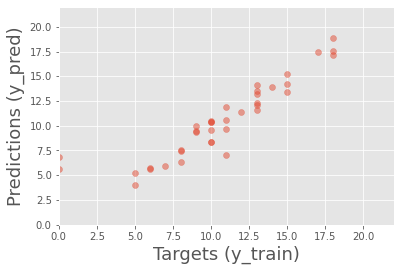

In [30]:
plt.scatter(y_test, y_pred, alpha=0.5)
# Let's also name the axes
plt.xlabel('Targets (y_train)',size=18)
plt.ylabel('Predictions (y_pred)',size=18)
# Sometimes the plot will have different scales of the x-axis and the y-axis
# This is an issue as we won't be able to interpret the '45-degree line'
# We want the x-axis and the y-axis to be the same
plt.xlim(0,22)
plt.ylim(0,22)
plt.show()

#### From the above graph we can clearly say that our model predicts almost accurate results. 
#### Howerver there are few wrong predictions. More tranning the model might help. 